In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/go-emotions-google-emotions-dataset/go_emotions_dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from wordcloud import WordCloud

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
data = pd.read_csv("/kaggle/input/go-emotions-google-emotions-dataset/go_emotions_dataset.csv")

In [4]:
data.head()

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
data.describe()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
count,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,...,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000
mean,0.081103,0.043768,0.038272,0.064472,0.083418,0.028401,0.034840,0.045885,0.018071,0.040095,...,0.038779,0.008569,0.041259,0.006164,0.041591,0.006102,0.011954,0.031994,0.026105,0.261797
std,0.272994,0.204580,0.191853,0.245592,0.276514,0.166116,0.183374,0.209236,0.133208,0.196182,...,0.193067,0.092172,0.198890,0.078269,0.199653,0.077880,0.108679,0.175985,0.159448,0.439614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.shape

(211225, 31)

In [7]:
data.isnull().sum().reset_index()

,index,0
0,id,0
1,text,0
2,example_very_unclear,0
3,admiration,0
4,amusement,0
5,anger,0
6,annoyance,0
7,approval,0
8,caring,0
9,confusion,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    211225 non-null  object
 1   text                  211225 non-null  object
 2   example_very_unclear  211225 non-null  bool  
 3   admiration            211225 non-null  int64 
 4   amusement             211225 non-null  int64 
 5   anger                 211225 non-null  int64 
 6   annoyance             211225 non-null  int64 
 7   approval              211225 non-null  int64 
 8   caring                211225 non-null  int64 
 9   confusion             211225 non-null  int64 
 10  curiosity             211225 non-null  int64 
 11  desire                211225 non-null  int64 
 12  disappointment        211225 non-null  int64 
 13  disapproval           211225 non-null  int64 
 14  disgust               211225 non-null  int64 
 15  embarrassment    

In [9]:
column = data.columns
column = column[2:]

for col in column:
    print(data[col].value_counts())
    print("\n")

False    207814
True       3411
Name: example_very_unclear, dtype: int64


0    194094
1     17131
Name: admiration, dtype: int64


0    201980
1      9245
Name: amusement, dtype: int64


0    203141
1      8084
Name: anger, dtype: int64


0    197607
1     13618
Name: annoyance, dtype: int64


0    193605
1     17620
Name: approval, dtype: int64


0    205226
1      5999
Name: caring, dtype: int64


0    203866
1      7359
Name: confusion, dtype: int64


0    201533
1      9692
Name: curiosity, dtype: int64


0    207408
1      3817
Name: desire, dtype: int64


0    202756
1      8469
Name: disappointment, dtype: int64


0    199801
1     11424
Name: disapproval, dtype: int64


0    205924
1      5301
Name: disgust, dtype: int64


0    208749
1      2476
Name: embarrassment, dtype: int64


0    205596
1      5629
Name: excitement, dtype: int64


0    208028
1      3197
Name: fear, dtype: int64


0    199600
1     11625
Name: gratitude, dtype: int64


0    210552
1       673
Name: grie

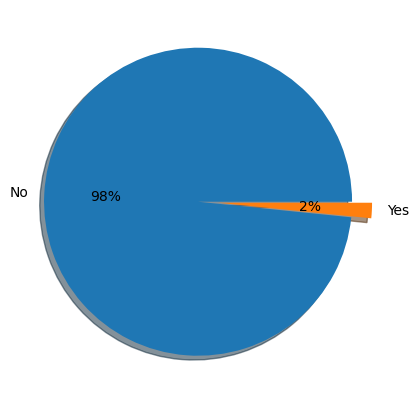

In [10]:
plt.figure(figsize = (5,5))
plt.pie(data["example_very_unclear"].value_counts(), labels = ['No','Yes'],autopct='%.0f%%', radius = 1, explode = (0.1,0.03), shadow = True)
plt.show()

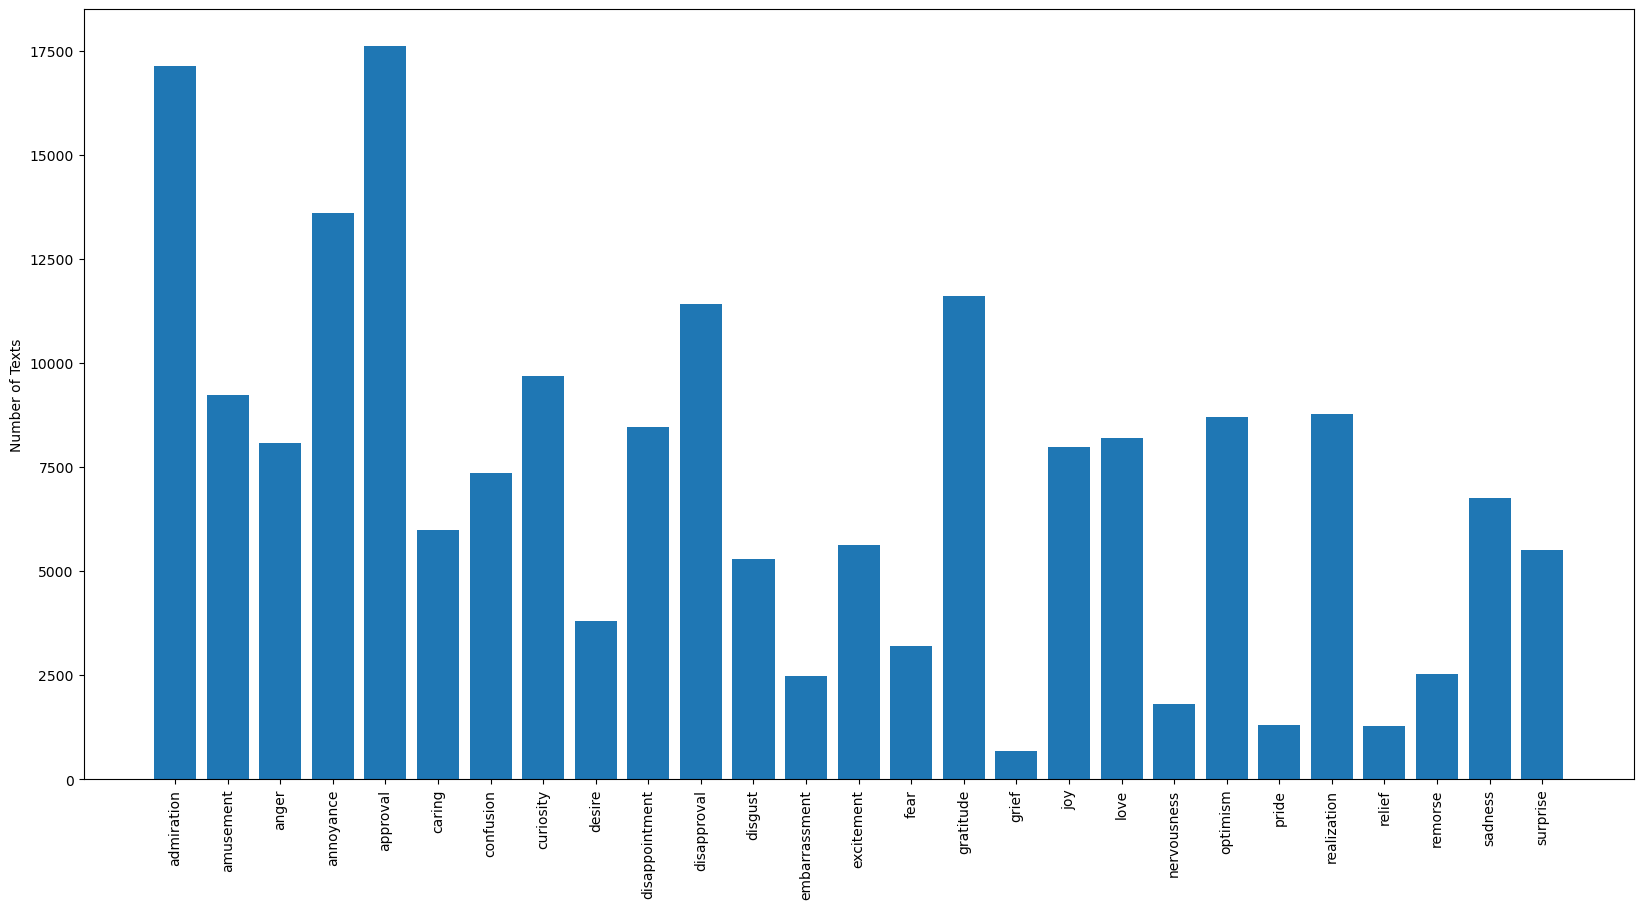

In [11]:
emotion_counts = {}
for c in data.columns[3:-1]:
    emotion_counts[c]  = data[c].value_counts().to_dict()[1]

    
name = list(emotion_counts.keys())
values = list(emotion_counts.values())
plt.figure(figsize=(20,10))
plt.bar(range(len(emotion_counts)), values, tick_label=name)
plt.ylabel("Number of Texts")
plt.xticks(rotation="vertical")
plt.show()

In [12]:
print("Distribution of number of labels per example:")
print(data[column[1:]].sum(axis=1).value_counts() / len(data))
print("%.2f with more than 3 labels" %
        ((data[column[1:]].sum(axis=1) > 3).sum() /
         len(data)))

Distribution of number of labels per example:
1     0.813445
2     0.147648
3     0.019969
0     0.016149
4     0.001889
5     0.000502
6     0.000251
7     0.000095
8     0.000028
9     0.000014
10    0.000005
12    0.000005
dtype: float64
0.00 with more than 3 labels


In [21]:
emotions_with_nuetral = column[1:]
emotions = column[1:-1]

positive_col = ['admiration','amusement','approval','caring','curiosity','excitement','gratitude','joy','love','optimism','relief','surprise']
negative_col = ['sadness','pride','fear','embarrassment','disapproval','disappointment','confusion','annoyance','anger','nervousness','desire']
ambiguous_col = ['remorse','realization','grief','disgust']
neutral_col = ['neutral']

In [13]:
print("Label distributions:")
print((data[emotions_with_nuetral].sum(axis=0).sort_values(ascending=False) /
         len(data) * 100).round(2))

Label distributions:
neutral           26.18
approval           8.34
admiration         8.11
annoyance          6.45
gratitude          5.50
disapproval        5.41
curiosity          4.59
amusement          4.38
realization        4.16
optimism           4.13
disappointment     4.01
love               3.88
anger              3.83
joy                3.78
confusion          3.48
sadness            3.20
caring             2.84
excitement         2.66
surprise           2.61
disgust            2.51
desire             1.81
fear               1.51
remorse            1.20
embarrassment      1.17
nervousness        0.86
pride              0.62
relief             0.61
grief              0.32
dtype: float64


In [22]:
df_emotion = pd.DataFrame()
df_emotion['emotion'] = list(emotions_with_nuetral)
df_emotion['group'] = 'standalone'
df_emotion['group'].loc[df_emotion['emotion'].isin(positive_col)] = 'positive'
df_emotion['group'].loc[df_emotion['emotion'].isin(negative_col)] = 'negative'
df_emotion['group'].loc[df_emotion['emotion'].isin(ambiguous_col)] = 'ambiguous'
df_emotion.head(3)

,emotion,group
0,admiration,positive
1,amusement,positive
2,anger,negative


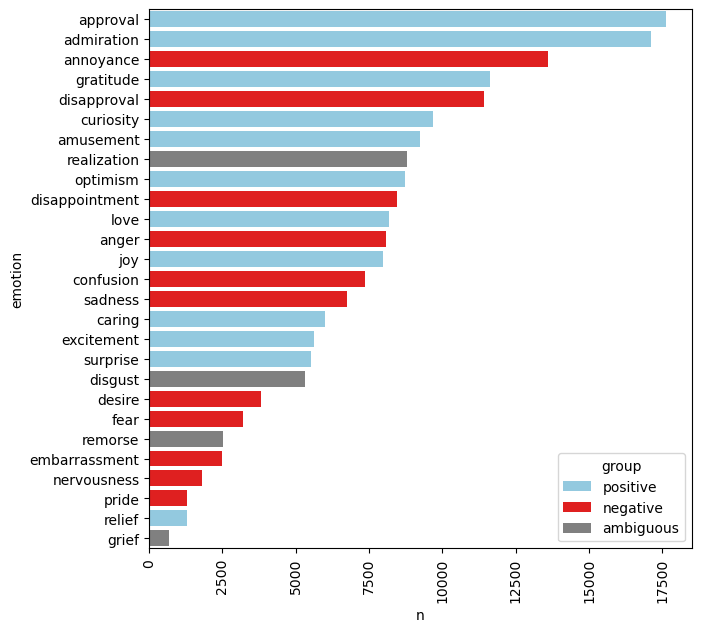

In [23]:
temp = data[emotions].sum(axis=0) \
    .reset_index() \
    .rename(columns={'index': 'emotion', 0: 'n'}) \
    .merge(df_emotion, how='left', on='emotion')\
    .sort_values('n', ascending=False)
temp = temp[temp['emotion'] != 'neutral']

fig, ax = plt.subplots(figsize=(7, 7))
ax.tick_params(axis='x', rotation=90)
palette ={
    "positive": "skyblue", 
    "negative": "red", 
    "ambiguous": 'gray'
}
sns.barplot(data=temp, x='n', 
            y='emotion', hue='group', 
            dodge=False,
            palette=palette,
            ax=ax)
plt.show()

/tmp/ipykernel_32/1989990602.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg('sum').reset_index()


<Axes: xlabel='group', ylabel='n'>

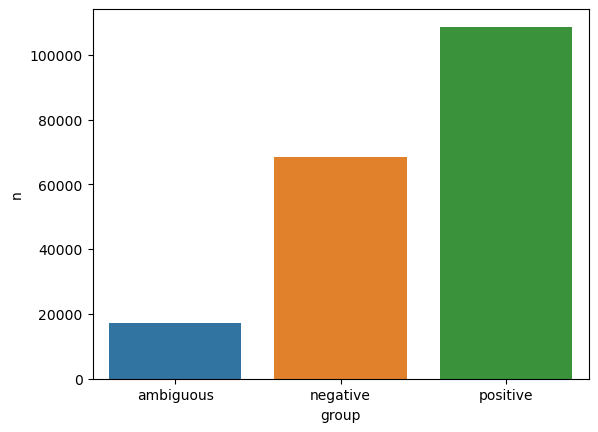

In [25]:
temp = temp.groupby('group') \
        .agg('sum').reset_index()

sns.barplot(data=temp, x='group', y='n')

Plotting label correlations...


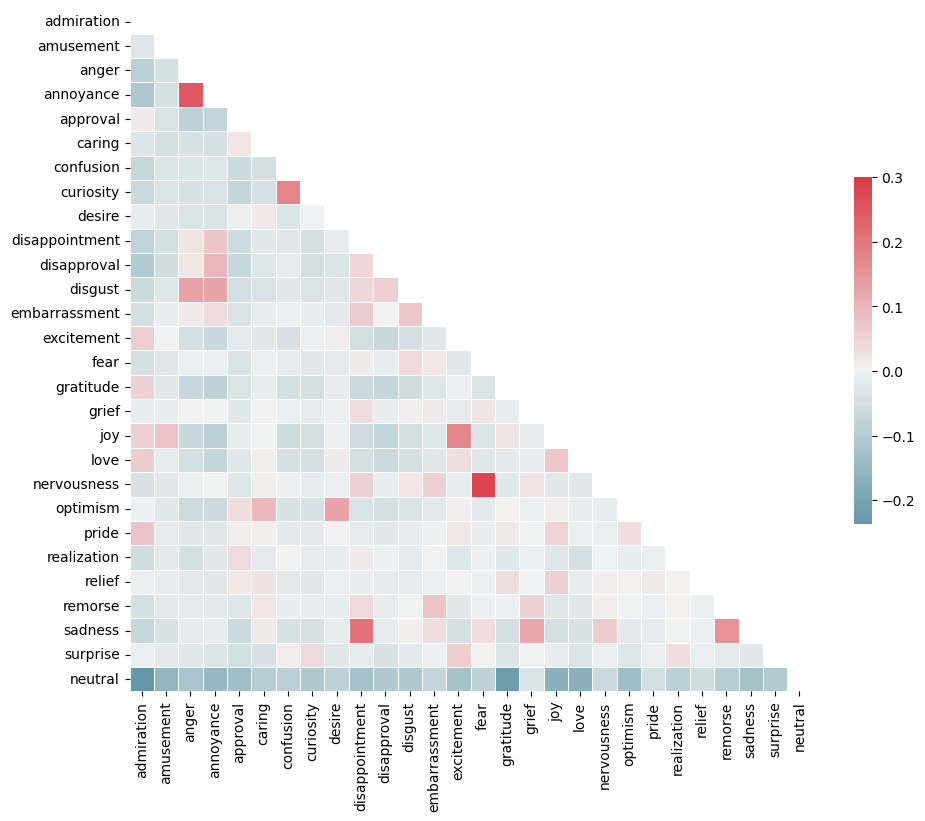

In [14]:
print("Plotting label correlations...")
ratings = data.groupby("id")[emotions_with_nuetral].mean()

corr = ratings.corr()

  # Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

  # Set up the matplotlib figure
fig, _ = plt.subplots(figsize=(11, 9))

  # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
      corr,
      mask=mask,
      cmap=cmap,
      vmax=.3,
      center=0,
      square=True,
      linewidths=.5,
      cbar_kws={"shrink": .5})
plt.show()

Plotting hierarchical relations...


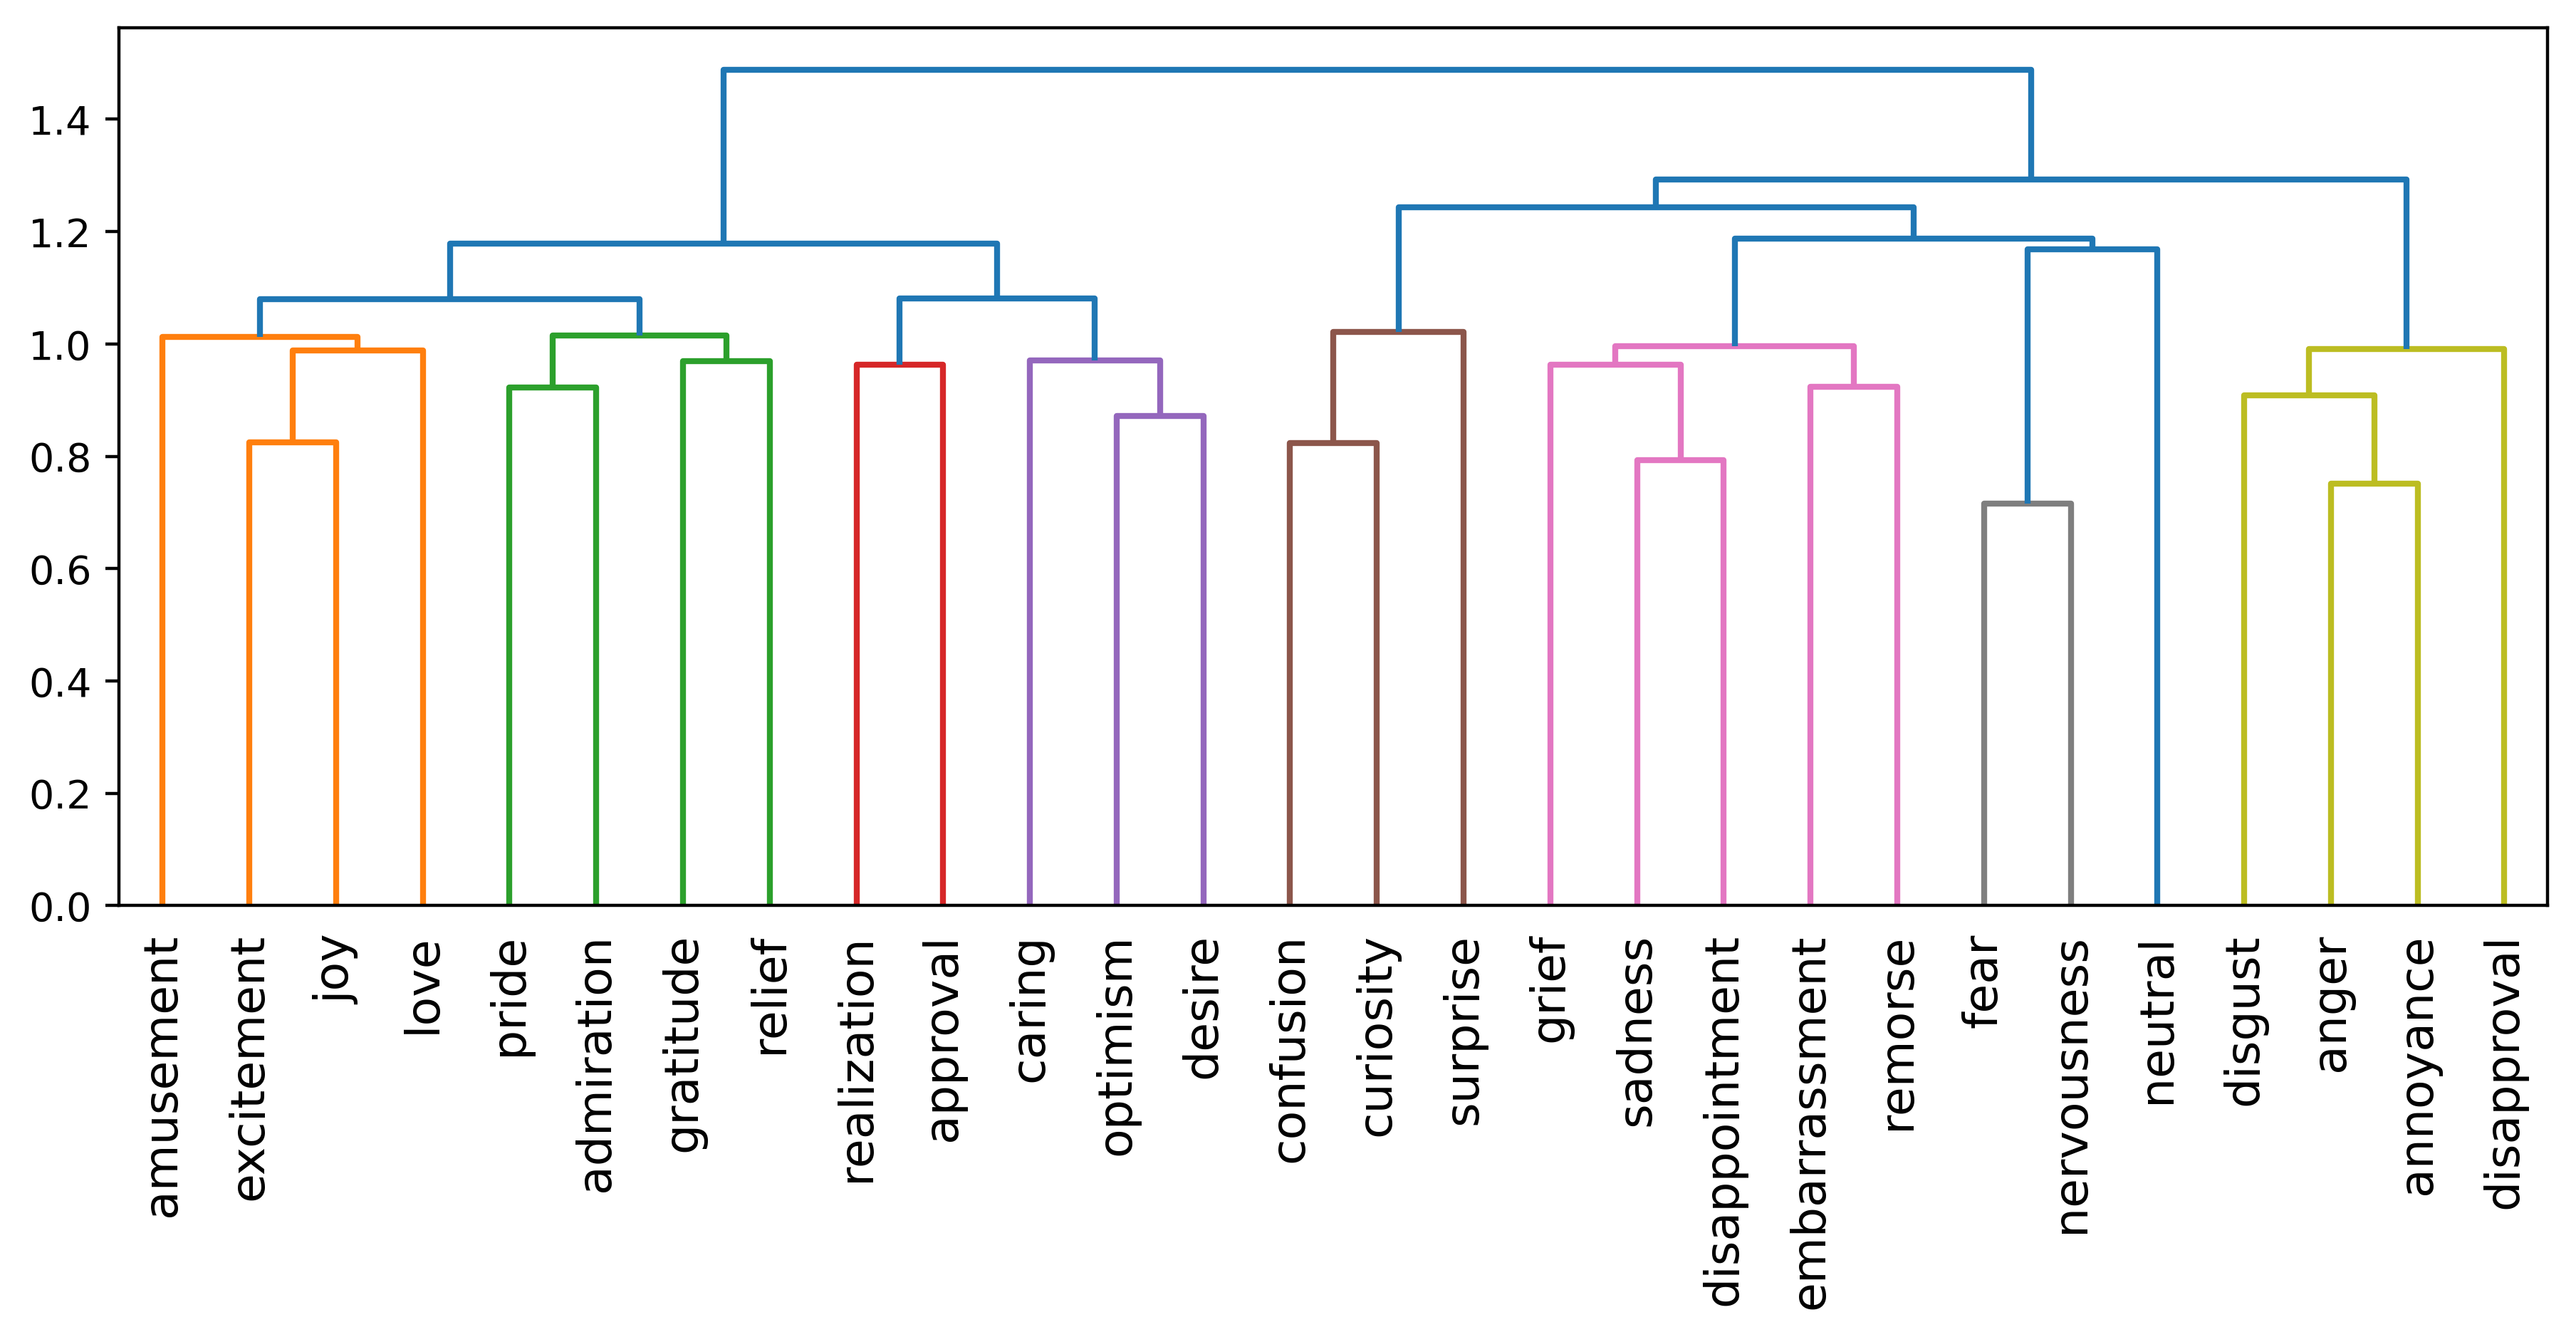

In [15]:
print("Plotting hierarchical relations...")
z = linkage(
      pdist(ratings.T, metric="correlation"),
      method="ward",
      optimal_ordering=True)
fig = plt.figure(figsize=(11, 4), dpi=400)
plt.xlabel("")
plt.ylabel("")
dendrogram(
      z,
      labels=ratings.columns,
      leaf_rotation=90.,  # rotates the x axis labels
      leaf_font_size=12,  # font size for the x axis labels
      color_threshold=1.05,
  )
plt.show()

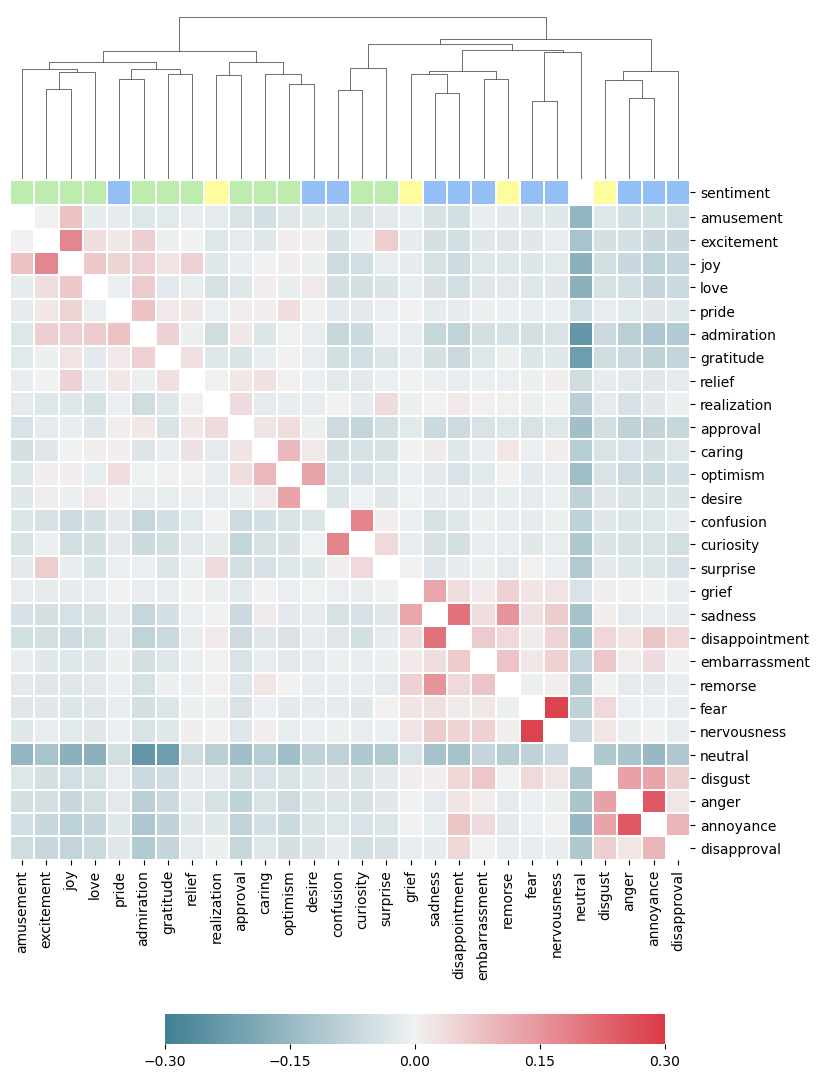

In [17]:
sent_color_map = {
      "positive": "#BEECAF",
      "negative": "#94bff5",
      "ambiguous": "#FFFC9E"
  }

sent_colors = {}
for emotion in emotions:
    if emotion in positive_col:
        sent_colors[emotion] = sent_color_map["positive"]
    elif emotion in negative_col:
        sent_colors[emotion] = sent_color_map["negative"]
    else:
        sent_colors[emotion] = sent_color_map["ambiguous"]
        
mask = np.zeros_like(corr, dtype=bool)
mask[np.diag_indices(mask.shape[0])] = True

  # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

row_colors = pd.Series(
      corr.columns, index=corr.columns, name="sentiment").map(sent_colors)

  # Draw the heatmap with the mask and correct aspect ratio
g = sns.clustermap(
      corr,
      mask=mask,
      cmap=cmap,
      vmax=.3,
      vmin=-0.3,
      center=0,
      row_linkage=z,
      col_linkage=z,
      col_colors=row_colors,
      linewidths=.1,
      cbar_kws={
          "ticks": [-.3, -.15, 0, .15, .3],
          "use_gridspec": False,
          "orientation": "horizontal",
      },
      figsize=(10, 10))

g.ax_row_dendrogram.set_visible(False)
g.cax.set_position([.34, -0.05, .5, .03])

Plotting number of labels...


/tmp/ipykernel_32/2409657568.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["%dk" % (int(int(label) / 1000)) for label in labels])


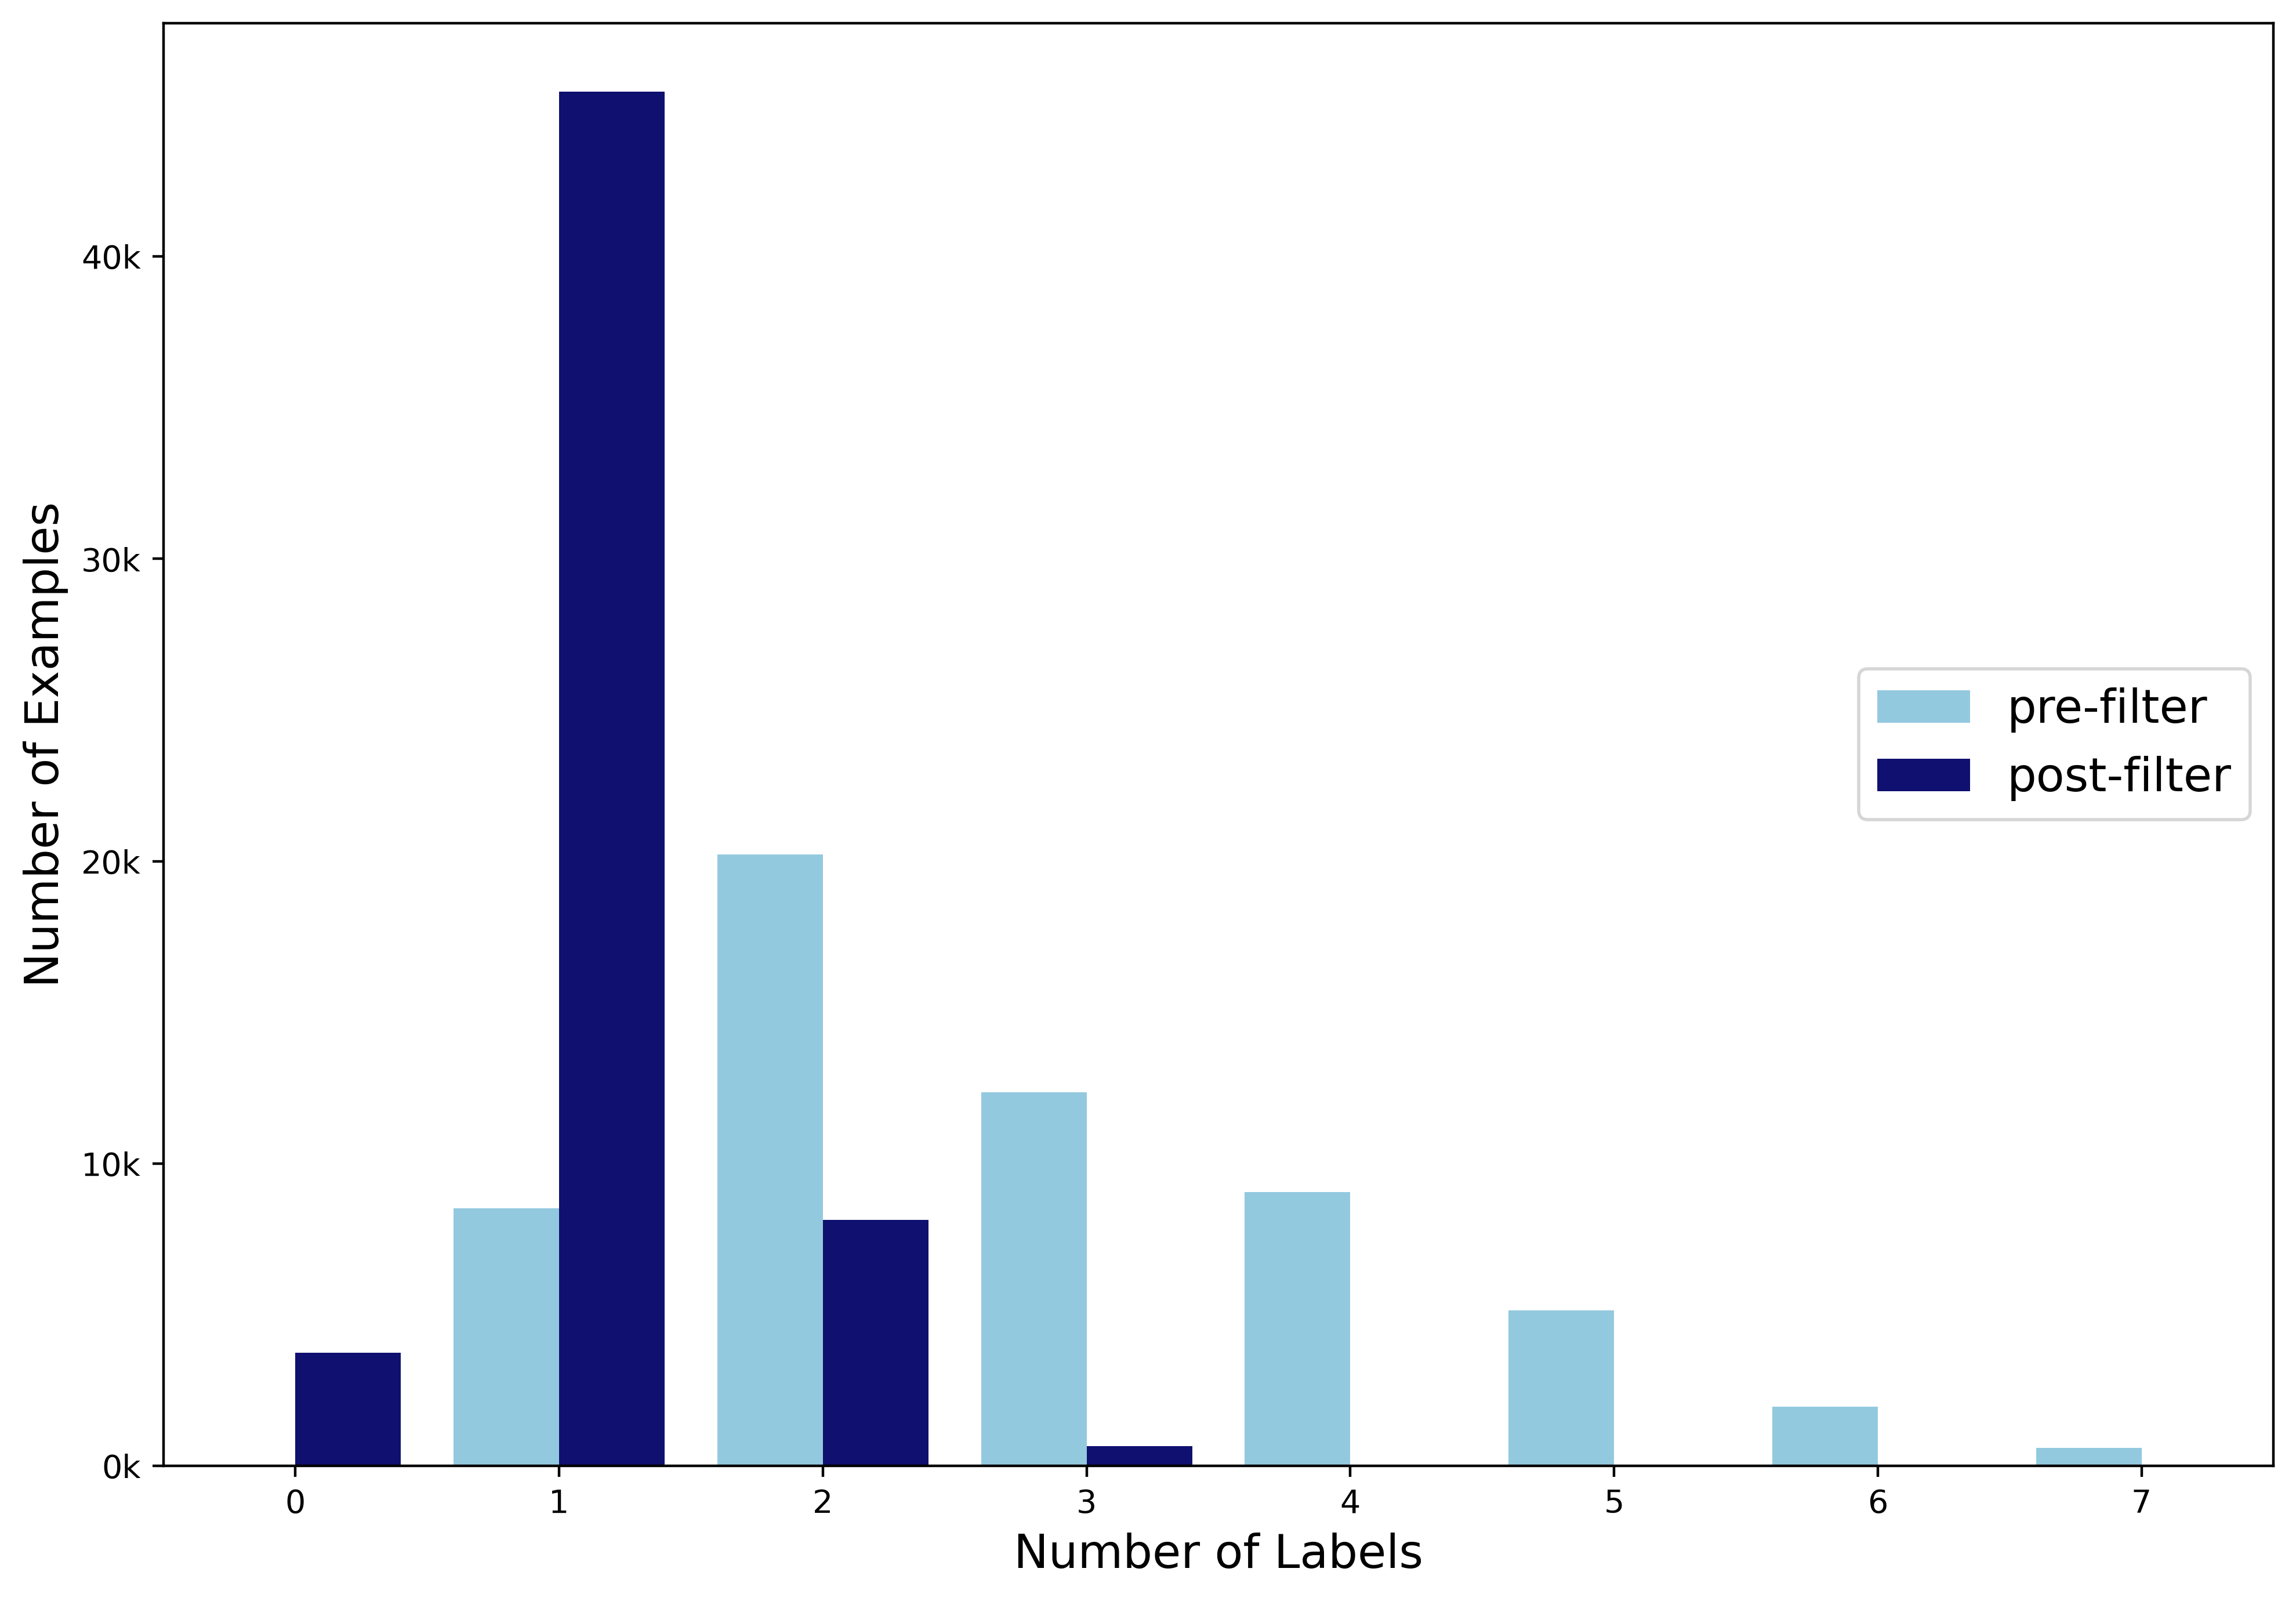

In [24]:
def CheckAgreement(ex, min_agreement, all_emotions, max_agreement=100):
    """Return the labels that at least min_agreement raters agree on."""
    sum_ratings = ex[all_emotions].sum(axis=0)
    agreement = ((sum_ratings >= min_agreement) & (sum_ratings <= max_agreement))
    return ",".join(sum_ratings.index[agreement].tolist())

def CountLabels(labels):
    if (not isinstance(labels, float)) and labels:
        return len(labels.split(","))
    return 0

unique_labels = data.groupby("id").apply(CheckAgreement, 1,
                                           emotions_with_nuetral).to_dict()
data["unique_labels"] = data["id"].map(unique_labels)

agree_dict_2 = data.groupby("id").apply(CheckAgreement, 2,
                                          emotions_with_nuetral).to_dict()
data["agree_2"] = data["id"].map(agree_dict_2)


print("Plotting number of labels...")
data["num_unique_prefilter"] = data["unique_labels"].apply(CountLabels)
data["num_unique_postfilter"] = data["agree_2"].apply(CountLabels)
unique_ex = data.drop_duplicates("id")
df = pd.DataFrame({
      "count":
          unique_ex["num_unique_prefilter"].tolist() +
          unique_ex["num_unique_postfilter"].tolist(),
      "type": ["pre-filter"] * len(unique_ex) + ["post-filter"] * len(unique_ex)
  })

fig = plt.figure(figsize=(10,7), dpi=400)
ax = sns.countplot(
      data=df, x="count", hue="type", palette=["skyblue", "navy"])
plt.xlim(-.5, 7.5)
plt.legend(loc="center right", fontsize="x-large")
plt.ylabel("Number of Examples", fontsize="x-large")
plt.xlabel("Number of Labels", fontsize="x-large")
plt.draw()
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(["%dk" % (int(int(label) / 1000)) for label in labels])
plt.tight_layout()